In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [7]:
df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx',sheet_name = 'Raw Data')

In [8]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [9]:
df.shape

(99956, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null object
Sneaker Name    99956 non-null object
Sale Price      99956 non-null float64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [12]:
df.isnull().values.any()

False

Quantity bought of each brand

In [15]:
df['Brand'].value_counts()

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

How many different sneakers are there?

In [16]:
df['Sneaker Name'].nunique()

50

Name of sneakers in the data

In [24]:
df['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Adidas-Yeezy-Boost-350-Low-Moonrock', 'Nike-Air-Max-90-Off-White',
       'Nike-Air-Presto-Off-White', 'Nike-Air-VaporMax-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Nike-Blazer-Mid-Off-White',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Nike-Air-Force-1-Low-Off-White', 'Nike-Air-Max-97-Off-White',
       'Nike-Air-Force-1-Low-Virgil

How many different regions are there?

In [17]:
df['Buyer Region'].nunique()

51

What are the regions?

In [23]:
df['Buyer Region'].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

Highest sale price

In [20]:
df[df['Sale Price'] == df['Sale Price'].max()]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
26870,2018-05-26,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,4050.0,190,2017-09-09,6.0,Wisconsin


Lowest sale price

In [21]:
df[df['Sale Price']== df ['Sale Price'].min()]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
70545,2018-12-05,Yeezy,Adidas-Yeezy-Boost-350-V2-Sesame,186.0,220,2018-11-23,4.0,New Jersey


In [22]:
df.describe()


,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634754,208.61359,9.344181
std,255.982918,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


Create Profit Margin Column

In [29]:
df['Profit Margin'] = ((df['Sale Price']-df['Retail Price'])/ df['Sale Price']).round(4)

In [30]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,0.7995
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,0.6788
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,0.6812
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,0.7953
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,0.7343


How could I forget profit?

In [31]:
df['Profit'] = df['Sale Price']-df['Retail Price']

In [32]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Profit
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,0.7995,877.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,0.6788,465.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,0.6812,470.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,0.7953,855.0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,0.7343,608.0


What shoes were bought under retail?

In [35]:
Loss = df[df['Profit']< 0]

What brand had a loss?

In [36]:
Loss['Brand'].unique()

array([' Yeezy'], dtype=object)

What shoes were undervalued?

In [37]:
Loss['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-V2-Cream-White',
       'adidas-Yeezy-Boost-350-V2-Butter',
       'Adidas-Yeezy-Boost-350-V2-Sesame',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow'], dtype=object)

Text(0, 0.5, 'Quantity')

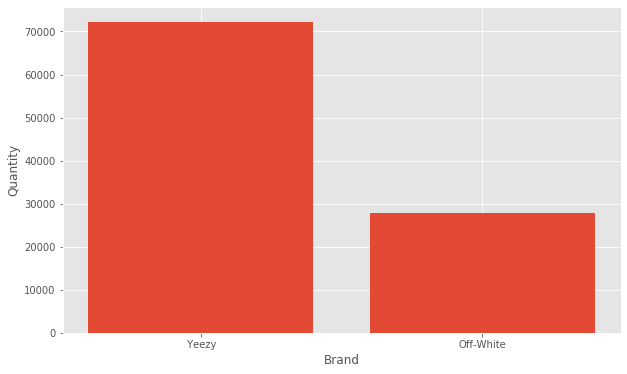

In [232]:

fig,ax = plt.subplots(figsize = (10,6))
ax.bar(brand,brand_count )
ax.set_xlabel('Brand')
ax.set_ylabel('Quantity')

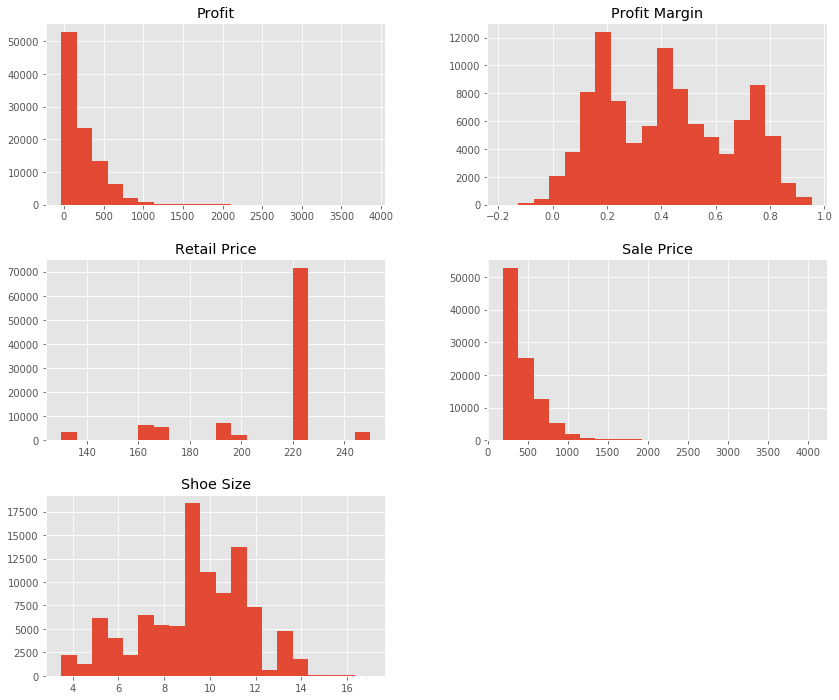

In [235]:
df.hist(figsize = (14,12), bins = 20);


In [187]:
df['region'] = df['Buyer Region'].apply(lambda x : region(x) )
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Profit,region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,0.7995,877.0,West
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,0.6788,465.0,West
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,0.6812,470.0,West
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,0.7953,855.0,South
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,0.7343,608.0,Northeast


In [186]:
def region(x):
    region = {0:['Arizona', 'Colorodo', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii','Oregon', 'Washington'], 1: ['Deleware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia','Alabama', 'Kentucky','Mississippi','Tennessee','Arkansas', 'Louisiana','Oklahoma','Texas'],2: ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin','Iowa', 'Kansas','Minnesota','Missouri','Nebraska', 'North Dakota', 'South Dakota'], 3: ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']} 
    numerical = {0: 'West', 1:'South', 2: 'Midwest', 3:'Northeast'}
    if x in region[0]:
        return numerical[0]
    elif x in region[1]:
        return numerical[1]
    elif x in region[2]:
        return numerical[2]
    else:
        return numerical[3]

In [233]:
df.isnull().values.any()

False

In [287]:
def bar_plot(x, y, x_label, y_label, horizontal = False):
		fig,ax = plt.subplots(figsize = (10,6))
		if horizontal:
			ax.barh(x,y, align = 'center')
			ax.set_xlabel(x_label)
			ax.set_ylabel(y_label)
		else:
			ax.bar(x,y, width = .35)
			ax.set_xlabel(x_label)
			ax.set_ylabel(y_label)


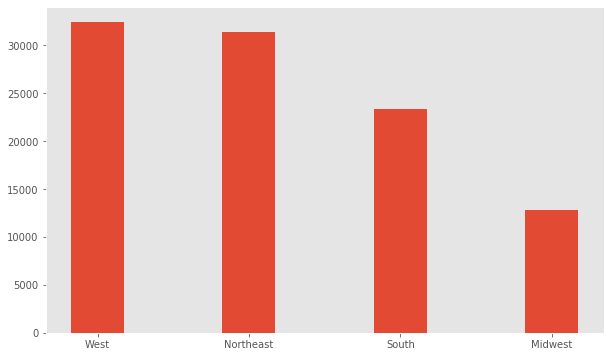

In [278]:
total = df['region'].value_counts()
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(total.index,total, width = .35)
ax.grid(False)


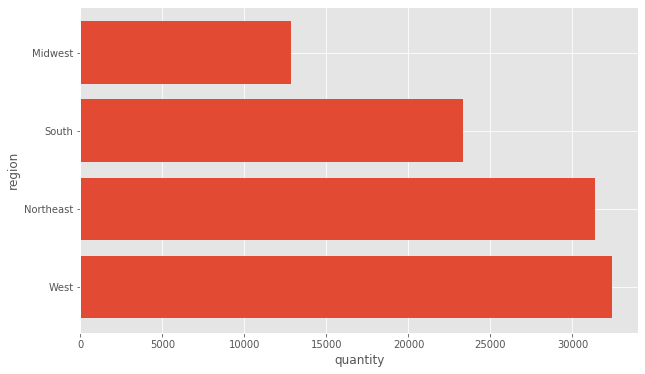

In [288]:
bar_plot(total.index,total,'quantity', 'region', horizontal = True)

In [ ]:
buyer_quantity = df['Buyer Region']